## The documentation for this data is [here](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/mtcars.html) 
```
#### Description ####

The data was extracted from the 1974 Motor Trend US magazine, and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973–74 models).

#### Usage ####

mtcars

#### Format ####

A data frame with 32 observations on 11 variables.

[, 1]	mpg	Miles/(US) gallon
[, 2]	cyl	Number of cylinders
[, 3]	disp	Displacement (cu.in.)
[, 4]	hp	Gross horsepower
[, 5]	drat	Rear axle ratio
[, 6]	wt	Weight (1000 lbs)
[, 7]	qsec	1/4 mile time
[, 8]	vs	V/S
[, 9]	am	Transmission (0 = automatic, 1 = manual)
[,10]	gear	Number of forward gears
[,11]	carb	Number of carburetors

#### Source ####

Henderson and Velleman (1981), Building multiple regression models interactively. Biometrics, 37, 391–411.
```

## Linear Regression against a single feature

In [1]:
import numpy as np 
import scipy as sp 
import matplotlib as mpl 
import matplotlib.cm as cm # allows us easy access to colormaps
import matplotlib.pyplot as plt 
import pandas as pd 

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns #sets up styles and gives us more plotting options

/Users/yuanhongjian/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The examples.directory rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2. In the future, examples will be found relative to the 'datapath' directory.
  self[key] = other[key]
/Users/yuanhongjian/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/yuanhongjian/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  self[key] = other[key]
/Users/yuanhongjian/opt/anaconda3/lib/python3.7/_collections_abc.py:841: MatplotlibDeprecationWarning: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  self[key] = other[key]
/Users/yuanhongjian/opt/anaconda3/lib/python3.7/

In [2]:
df_cars=pd.read_csv("data/mtcars-course.csv") 
df_cars=df_cars.rename(columns={"Unnamed: 0":"name"})
df_cars.head() 

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,A,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,A,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,A,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,M,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,M,3,2


## Numpy indexing and the train-test split

We can use range to construct an object which represents the list of numbers between 0 and some N. This is done as `range(N)`.

In [3]:
length_dataframe = df_cars.shape[0]
range(length_dataframe)

range(0, 32)

Lets use `range` in the construction of training and test sets. Recall that we split our data into training and test sets so that we can evaluate our model on the test set. The diagram below illustrates a situation in which we split our dataset 80% training, with the remaining 20% testing.

![](images/train-test.png)

Our general strategy is to do this randomly. `sklearn` gives us an easy to use function for this purpose. Notice that we split the range, which then leads to a materialization into lists of indices

In [4]:
from sklearn.model_selection import train_test_split

split = train_test_split(range(length_dataframe), train_size=0.8)
i_train, i_test = split
df_cars.iloc[i_train].head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,A,4,1
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,M,3,4
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,A,4,1
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,M,3,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,M,4,4


## Creating features for regression

Our next job is to create the weight feature training set for our regression.

In [5]:
x_train = df_cars.wt.values[i_train]
x_test = df_cars.wt.values[i_test]
y_train = df_cars.mpg.values[i_train]
y_test = df_cars.mpg.values[i_test]


## The shape of things in scikit-learn


In [6]:
X_train = x_train.reshape(x_train.shape[0], 1)
X_test = x_test.reshape(x_test.shape[0], 1)

## Regress

In [7]:
#import linear model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#create linear model
regression = LinearRegression()

#fit linear model
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
#predict y-values
predicted_y = regression.predict(X_test)

In [9]:
r2 = regression.score(X_test, y_test)

In [10]:
mean_squared_error(predicted_y, y_test)

5.654054816092809

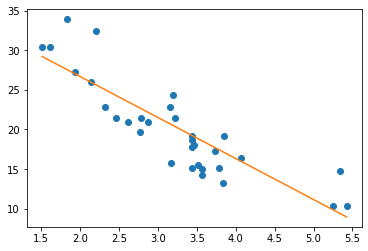

In [13]:
plt.plot(df_cars.wt, df_cars.mpg, 'o')
x_grid = np.linspace(np.min(df_cars.wt), np.max(df_cars.wt), 100)
plt.plot(x_grid, regression.predict(x_grid.reshape(100, 1)));